Naive Bayes Classifier의 이해 - 영문

In [1]:
from nltk.tokenize import word_tokenize
import nltk

In [2]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [3]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [4]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'hate': False,
   'her': False,
   'me': False,
   'like': True,
   'i': True,
   'you': True},
  'pos'),
 ({'hate': True,
   'her': False,
   'me': False,
   'like': False,
   'i': True,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': False,
   'me': True,
   'like': True,
   'i': False,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': True,
   'me': False,
   'like': True,
   'i': True,
   'you': False},
  'pos')]

In [5]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0


In [6]:
test_sentence ='i like MeRui'
test_sent_features= {word.lower():
                                (word in word_tokenize(test_sentence.lower()))
                                 for word in all_words}
test_sent_features

{'hate': False,
 'her': False,
 'me': False,
 'like': True,
 'i': True,
 'you': False}

In [7]:
classifier.classify(test_sent_features)

'pos'

Naive Bayes Classifier의 이해 - 한글

In [8]:
from konlpy.tag import Okt

In [9]:
pos_tagger = Okt()

In [10]:
train =[('메리가 좋아','pos'),
        ('고양이도 좋아', 'pos'),
        ('난 수업이 지루해','neg'),
        ('메리는 이쁜 고양이야','pos'),
        ('난 마치고 메리랑 놀거야','pos')]

In [11]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [12]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'난': False,
   '고양이야': False,
   '수업이': False,
   '메리는': False,
   '고양이도': False,
   '이쁜': False,
   '메리랑': False,
   '놀거야': False,
   '지루해': False,
   '좋아': True,
   '마치고': False,
   '메리가': True},
  'pos'),
 ({'난': False,
   '고양이야': False,
   '수업이': False,
   '메리는': False,
   '고양이도': True,
   '이쁜': False,
   '메리랑': False,
   '놀거야': False,
   '지루해': False,
   '좋아': True,
   '마치고': False,
   '메리가': False},
  'pos'),
 ({'난': True,
   '고양이야': False,
   '수업이': True,
   '메리는': False,
   '고양이도': False,
   '이쁜': False,
   '메리랑': False,
   '놀거야': False,
   '지루해': True,
   '좋아': False,
   '마치고': False,
   '메리가': False},
  'neg'),
 ({'난': False,
   '고양이야': True,
   '수업이': False,
   '메리는': True,
   '고양이도': False,
   '이쁜': True,
   '메리랑': False,
   '놀거야': False,
   '지루해': False,
   '좋아': False,
   '마치고': False,
   '메리가': False},
  'pos'),
 ({'난': True,
   '고양이야': False,
   '수업이': False,
   '메리는': False,
   '고양이도': False,
   '이쁜': False,
   '메리랑': True,
   '놀거야': True,
   '지루해': False,
   '좋아': 

In [13]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0


In [14]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [15]:
test_sent_features= {word.lower():
                            (word in word_tokenize(test_sentence.lower()))
                             for word in all_words}
test_sent_features

{'난': True,
 '고양이야': False,
 '수업이': True,
 '메리는': False,
 '고양이도': False,
 '이쁜': False,
 '메리랑': True,
 '놀거야': True,
 '지루해': False,
 '좋아': False,
 '마치고': False,
 '메리가': False}

In [16]:
classifier.classify(test_sent_features)

'neg'

In [17]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [18]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [19]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [22]:
def term_exists(docs):
    return {word: (word in set(docs)) for word in tokens}

In [23]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [24]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [25]:
test_sentence=[("난 수업이 마치면 메리랑 놀거야")]

In [26]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [27]:
classifier.show_most_informative_features()

Most Informative Features
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  야/Josa = False             neg : pos    =      1.1 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0


In [29]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [30]:
classifier.classify(test_sent_features)

'pos'

검색어 찾기

In [36]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [37]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [38]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    크리스마스 여친   여자 겨울 선물   스트레치 엔젤스 파니니   just buy them both   여자친구 겨울 선물   스윙스 여친   킨트 발찌   스윙스 제시   여친 목걸이   여친과 크리스마스     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  화이트데이 여친 선물 몇개만여~   2017.03.05.   ㅠㅠ 인제 화이트데이 여친 선물을 또 준비 ㅠㅠ 이쁜 화이트데이 여친 선물... 화이트데이 여친 선물들중에서 싸면서 좀 알찬거 없을까여?? 인형은 빼고 알려주세여~ 뽑기...   답변 화이트데이 여친 선물 질문을 하신거보니 찾으시다가 답답해서 올리신것 같습니다.^^ 화이트데이 여친 선물로... 제가 말씀드릴 화이트데이 여친 선물들은 꽃,사탕,초콜릿...      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.   어떻게 선택을 해야 할지를 모르는데 빼빼로데이 여친선물 추천 부탁드립니다. 처음 여친을 사귀는 거라 어떤것을 해야 할지를 모르겠네요.   답변 빼빼로데이 여친 선물 추천 때문에 질문을 주신거 같으신데요.. 찾아보시면은 빼빼로데이 여친 선물 추천 드리고... 빼빼로데이 다가오면은 여친 선물 하려고 준비를 하는...      ',
 '  질문  헤어진 전여친 선물   2018.01.10.   제목 그대로 헤어진 전 여자친구에게 선물을 전해주고싶어 글 올립니다. 8개월간 만난 여자친구와 헤어진지 8일이 지났는데 여자친구가 스트레스로 인해 피부가 많이...   답변 그냥 주지 마세요 헤어졌는데 뭘 줍니까      ',
 '  질문  화이트데이 여친선물 

In [39]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [40]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구 생일선물   여자 근력운동   여자친구 100일 선물   10대 여자친구 선물   와일드망고   친구 선물   여자친구 목걸이   스킨케어   여자 30대 선물   20대 여자친구 선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여자친구선물 괜찮은거 있어요? (30대 전후)   2018.10.29.   생각나는 여자친구선물이 없네요ㅠ 저는 가격은 큰 상관없지만 이번생일에는 특별하고 간직할 만한 여자친구선물이면 좋을거같아요. 여자친구선물 추천 좀 꼭...   답변 벌써 여자친구선물을 사야할 때가왔나? 그래도 마음을... 보다 여자친구선물로 높은 선호도가 있어요. 전... 노미네이션을 여자친구선물로 추천하는 이유는 여친과의...      ',
 '  질문  여자친구선물 때문에 질문 드릴게요   2018.11.22.   20대 후반 동갑내기 커플인데요~ 이번에 1주년 기념으로 여자친구선물 해주고 싶은데, 일단 생각해둔 건 반지나 목걸이 같은 주얼리입니다. 자금이 많이 여유로운 건 아니라...   답변 여자친구선물로 주얼리를 생각 중이신가봐요^^ 아무래도 주얼리는 가격대가... 여자친구선물로 주얼리 구입을 생각 중이시라면 아페라모를 한번 알아보시길...      ',
 '  질문  여자친구 선물 예쁜거 추천해주세요   2018.10.29.   여자친구 선물로 고민이에요 달랑 과자만 주기에도 그렇고, 고급스러운 걸 같이 주려니... 여자친구 선물로... 과자랑 같이 줄만한 예쁜 여자친구 선물 좀 추천해주세요   답변 여자친구 선물로 뭘줄지 고민이신가보네요 ^^ 하긴... 있고, 여자친구 선물 고르기가

In [41]:
len(present_candi_text)

1300

In [42]:

import nltk
from konlpy.tag import Twitter; t = Okt()

In [43]:
present_text = ''
for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [44]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100일',
 '선물',
 '10',
 '대',
 '여자친구',
 '선물',
 '와일드',
 '망고',
 '친구',
 '선물',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '30',
 '대',
 '선물',
 '20',
 '대',
 '여자친구',
 '선물',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '여자친구',
 '선물',
 '괜찮은',
 '거',
 '있어요',
 '?',
 '(',
 '30',
 '대',
 '전후',
 ')',
 '2018.10',
 '.',
 '29',
 '.',
 '생각나는',
 '여자친구',
 '선물',
 '이',
 '없네요',
 'ㅠ',
 '저',
 '는',
 '가격',
 '은',
 '큰',
 '상관없지만',
 '이번',
 '생일',
 '에는',
 '특별하고',
 '간',
 '직할',
 '만',
 

In [45]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

81100
377


In [46]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 4700),
 ('여자친구', 3800),
 ('.', 3500),
 ('...', 2200),
 ('가', 1400),
 ('로', 1400),
 ('질문', 1100),
 ('답변', 1000),
 ('를', 900),
 ('목걸이', 900),
 ('?', 900),
 ('추천', 900),
 ('을', 900),
 ('도', 900),
 ('대', 800),
 ('은', 800),
 ('에', 700),
 (',', 700),
 ('나', 700),
 ('시계', 700),
 ('한', 600),
 ('요', 600),
 ('향수', 600),
 ('단어', 500),
 ('는', 500),
 ('여자', 500),
 ('20', 500),
 ('이', 500),
 ('좀', 500),
 ('중', 500),
 ('안녕하세요', 500),
 ('검색', 400),
 ('하는', 400),
 ('의', 400),
 ('저', 400),
 ('이번', 400),
 ('주얼리', 400),
 ('고민', 400),
 ('립스틱', 400),
 ('입력', 300),
 ('때', 300),
 ('후', 300),
 ('있어요', 300),
 ('29', 300),
 ('만', 300),
 ('인데', 300),
 ('~', 300),
 ('생각', 300),
 ('^^', 300),
 ('랑', 300),
 ('에서', 300),
 ('하는데', 300),
 ('들', 300),
 ('팔찌', 300),
 ('안', 300),
 ('아리따움', 300),
 ('더', 300),
 ('포함', 200),
 ('된', 200),
 ('기', 200),
 ('할', 200),
 ('사용', 200),
 ('개', 200),
 ('연관검색어', 200),
 ('생일', 200),
 ('100일', 200),
 ('30', 200),
 ('1', 200),
 ('괜찮은', 200),
 ('거', 200),
 ('2018.10', 200),
 ('가격', 

In [47]:

ko.similar('여자친구')

In [48]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 4700),
 ('여자친구', 3800),
 ('목걸이', 900),
 ('추천', 900),
 ('나', 700),
 ('시계', 700),
 ('향수', 600),
 ('여자', 500),
 ('안녕하세요', 500),
 ('검색', 400),
 ('저', 400),
 ('이번', 400),
 ('주얼리', 400),
 ('고민', 400),
 ('립스틱', 400),
 ('입력', 300),
 ('있어요', 300),
 ('29', 300),
 ('만', 300),
 ('생각', 300),
 ('^^', 300),
 ('랑', 300),
 ('에서', 300),
 ('하는데', 300),
 ('팔찌', 300),
 ('안', 300),
 ('아리따움', 300),
 ('더', 300),
 ('포함', 200),
 ('된', 200),
 ('기', 200),
 ('사용', 200),
 ('개', 200),
 ('연관검색어', 200),
 ('생일', 200),
 ('100일', 200),
 ('30', 200),
 ('괜찮은', 200),
 ('2018.10', 200),
 ('가격', 200),
 ('이면', 200),
 ('전', 200),
 ('여친', 200),
 ('2018.11', 200),
 ('해주고', 200),
 ('건', 200),
 ('입니다', 200),
 ('여유', 200),
 ('아니라', 200),
 ('이신가', 200)]

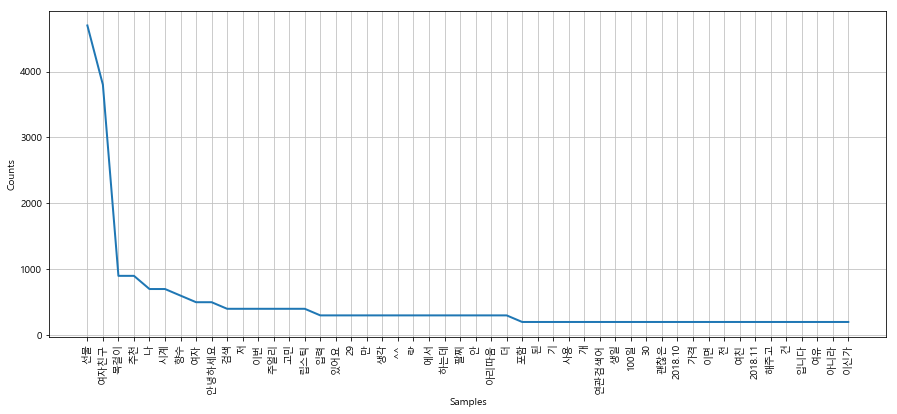

In [49]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [50]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

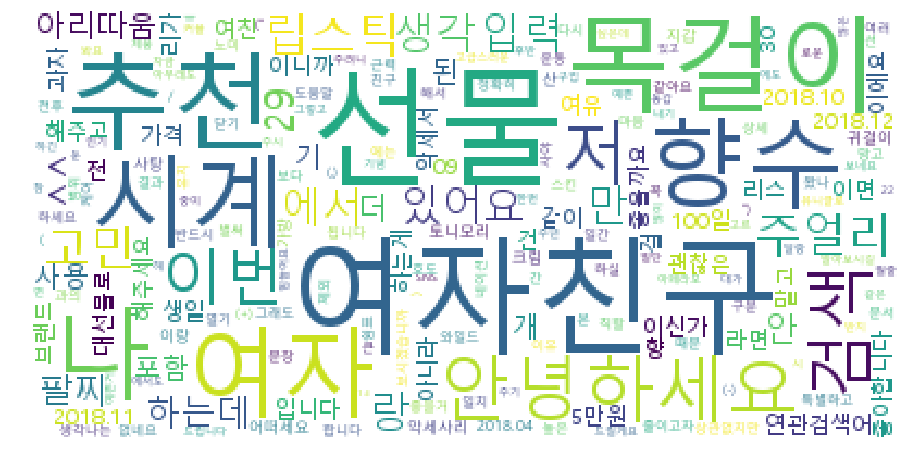

In [51]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [52]:

mask = np.array(Image.open('c://BigData/DataScience/data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [55]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

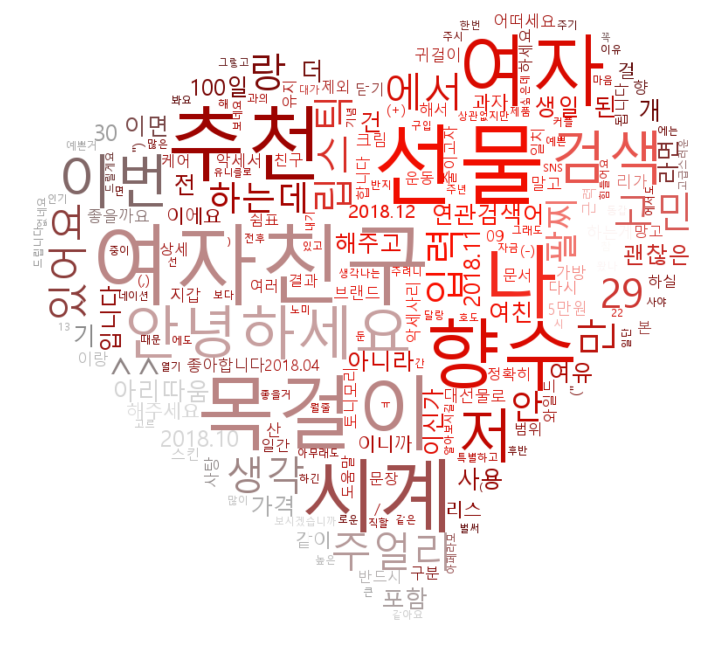

In [56]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()